In [3]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

# 한글 깨짐 문제
from matplotlib import font_manager, rc

# 그래프 배경
sns.set(style = "darkgrid")

# 그래프 바로 보기
%matplotlib inline

In [41]:
# 필요 파일 불러오기
raw_data= pd.read_csv("C:/project2/raw_data.csv", encoding="euc-kr")
raw_data.head()

# 행, 열 크기 확인
raw_data.shape

# 데이터 프레임 정보
raw_data.info()

# 요약 통계량
raw_data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264 entries, 0 to 263
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   기간         264 non-null    object
 1   한국 수출금액    264 non-null    object
 2   한국의대중국수출   264 non-null    object
 3   한국의대미국수출   264 non-null    object
 4   한국의대베트남수출  264 non-null    object
 5   한국의대홍콩수출   264 non-null    object
 6   한국의대일본수출   264 non-null    object
dtypes: object(7)
memory usage: 14.6+ KB


,기간,한국 수출금액,한국의대중국수출,한국의대미국수출,한국의대베트남수출,한국의대홍콩수출,한국의대일본수출
count,264,264,264,264,264,264,264
unique,264,264,264,264,264,264,264
top,Jan-00,"12,162,424,632","1,235,215,271","2,609,787,984","109,742,698","782,348,732","1,551,722,070"
freq,1,1,1,1,1,1,1


In [42]:
# 원활한 데이터 분석을 위해 열 이름 변경
raw_data.columns = ['period', 'korea_export_amount', 'T_china_export_amount',
                    'T_america_export_amount', 'T_vietnam_export_amount',
                    'T_hongkong_export_amount', 'T_japan_export_amount']
raw_data.head()

,period,korea_export_amount,T_china_export_amount,T_america_export_amount,T_vietnam_export_amount,T_hongkong_export_amount,T_japan_export_amount
0,Jan-00,"12,162,424,632","1,235,215,271","2,609,787,984","109,742,698","782,348,732","1,551,722,070"
1,Feb-00,"12,676,042,304","1,273,117,309","2,554,309,883","112,395,157","823,990,122","1,518,844,843"
2,Mar-00,"14,429,703,086","1,437,377,223","2,946,820,669","150,134,562","911,648,256","1,783,564,618"
3,Apr-00,"13,522,040,017","1,366,876,604","2,698,029,849","169,146,208","863,243,219","1,582,707,525"
4,May-00,"14,636,754,971","1,663,240,667","3,167,181,403","169,411,680","887,081,090","1,671,039,709"


In [45]:
# 데이터 프레임 내 컬럼 숫자형으로 변경 - 쉼표 제거

# 바꿔야 하는 데이터 프레임 리스트
num_list = ["korea_export_amount", "T_china_export_amount", 
            "T_america_export_amount", "T_vietnam_export_amount",
            "T_hongkong_export_amount", "T_japan_export_amount"]


# 데이터 프레임 내 컬럼 콤마 제거, 숫자형으로 변경
def to_int(trade):
    trade = trade.replace(',', '')
    trade = int(trade)
    return trade

T_hongkong_export_amount = raw_data.T_hongkong_export_amount.apply(to_int)
korea_export_amount = raw_data.korea_export_amount.apply(to_int)

# korea_export_amount.head()
T_hongkong_export_amount.head()

0    782348732
1    823990122
2    911648256
3    863243219
4    887081090
Name: T_hongkong_export_amount, dtype: int64

In [51]:
# 데이터 프레임 내 컬럼 숫자형으로 변경 - thousands 함수사용
raw_data = pd.read_csv("C:/project2/raw_data.csv", thousands=',', encoding= 'euc-kr')

# 데이터 컬럼 명 변경
raw_data.columns = ['period', 'korea_export_amount', 'T_china_export_amount',
                    'T_america_export_amount', 'T_vietnam_export_amount',
                    'T_hongkong_export_amount', 'T_japan_export_amount']

raw_data.head()


,period,korea_export_amount,T_china_export_amount,T_america_export_amount,T_vietnam_export_amount,T_hongkong_export_amount,T_japan_export_amount
0,Jan-00,12162424632,1235215271,2609787984,109742698,782348732,1551722070
1,Feb-00,12676042304,1273117309,2554309883,112395157,823990122,1518844843
2,Mar-00,14429703086,1437377223,2946820669,150134562,911648256,1783564618
3,Apr-00,13522040017,1366876604,2698029849,169146208,863243219,1582707525
4,May-00,14636754971,1663240667,3167181403,169411680,887081090,1671039709


In [78]:
# Jan 들어간 열 추출 
# period 열 중에서 Jan을 포함하는 열 추출
Jan_df = raw_data[raw_data['period'].str.contains('Jan')]
Jan_df.head()

# 월별 데이터 추출
Feb_df = raw_data[raw_data['period'].str.contains('Feb')]
Mar_df = raw_data[raw_data['period'].str.contains('Mar')]
Apr_df = raw_data[raw_data['period'].str.contains('Apr')]
May_df = raw_data[raw_data['period'].str.contains('May')]
Jun_df = raw_data[raw_data['period'].str.contains('Jun')]
Jul_df = raw_data[raw_data['period'].str.contains('Jul')]
Aug_df = raw_data[raw_data['period'].str.contains('Aug')]
Seb_df = raw_data[raw_data['period'].str.contains('Seb')]
Oct_df = raw_data[raw_data['period'].str.contains('Oct')]
Nov_df = raw_data[raw_data['period'].str.contains('Nov')]
Dec_df = raw_data[raw_data['period'].str.contains('Dec')]


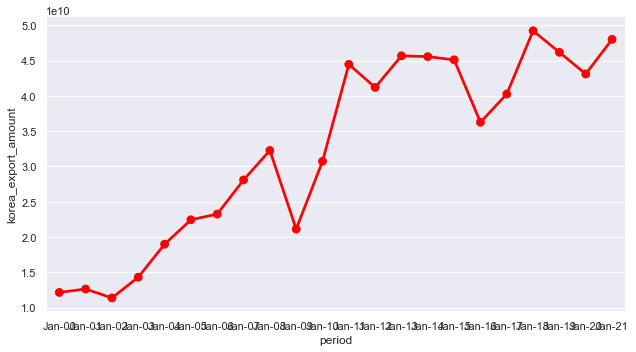

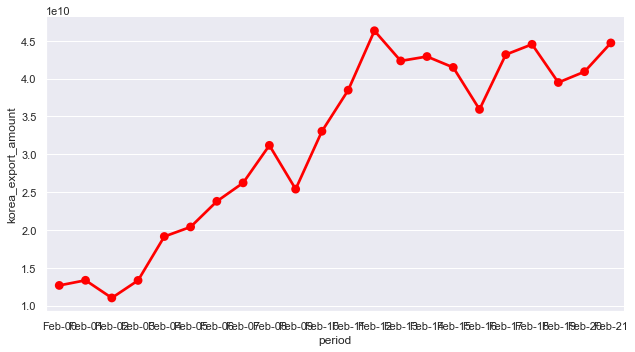

In [80]:
# 1월 한국 총 수출 데이터 
jan_korea_fig = sns.catplot(x = 'period', y = 'korea_export_amount', data = Jan_df,
                  kind = 'point', color = 'red')
jan_korea_fig.fig.set_size_inches(10, 5)

# 2월 한국 총 수출 데이터
feb_korea_fig = sns.catplot(x = 'period', y = 'korea_export_amount', data = Feb_df,
                  kind = 'point', color = 'red')
feb_korea_fig.fig.set_size_inches(10, 5)

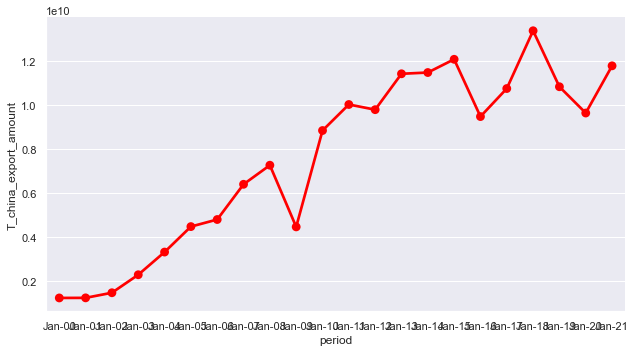

In [73]:
jan_china_fig = sns.catplot(x = 'period', y = 'T_china_export_amount', data = Jan_df,
                  kind = 'point', color = 'red')
jan_china_fig.fig.set_size_inches(10, 5)

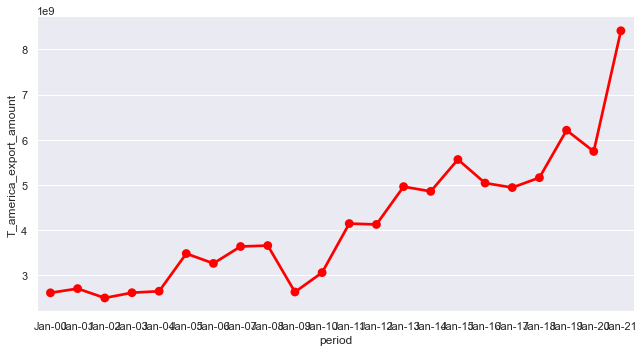

In [75]:
jan_america_fig = sns.catplot(x = 'period', y = 'T_america_export_amount', data = Jan_df,
                  kind = 'point', color = 'red')
jan_america_fig.fig.set_size_inches(10, 5)

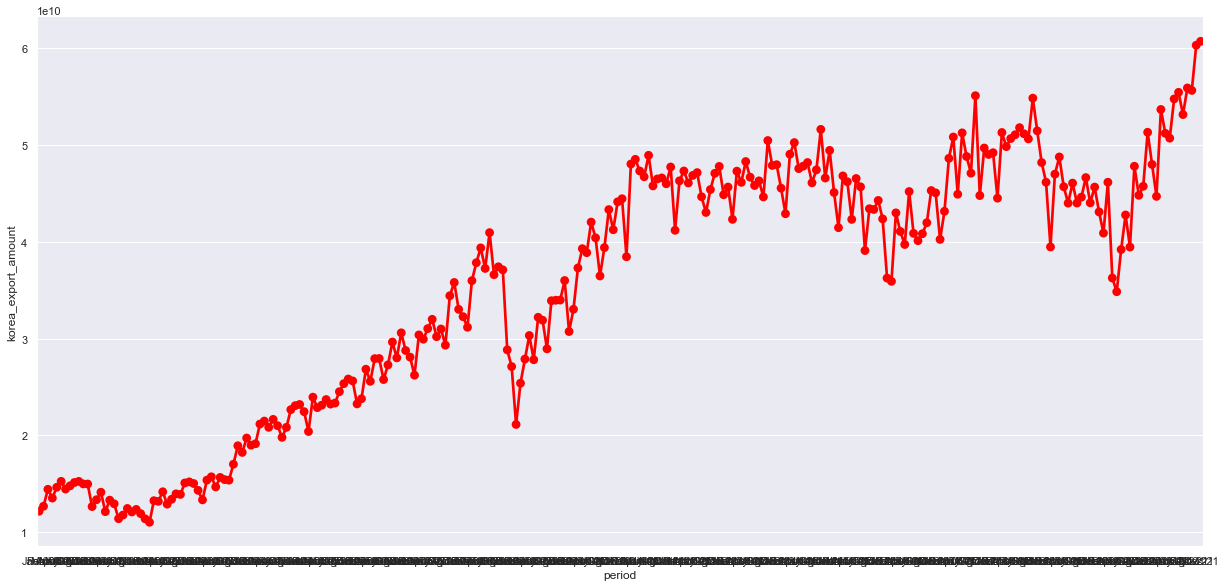

In [83]:
# 전체 흐름
all_fig = sns.catplot(x = 'period', y = 'korea_export_amount', data = raw_data,
                  kind = 'point', color = 'red')
all_fig.fig.set_size_inches(20,9)

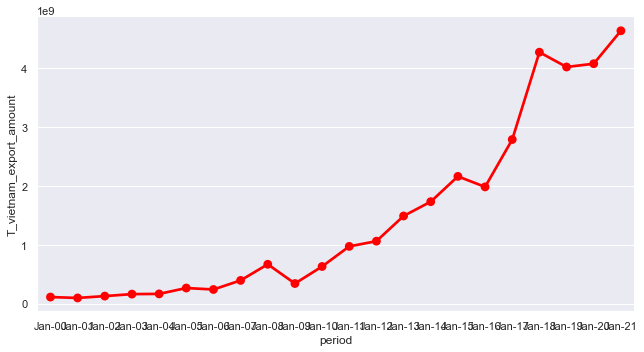

In [76]:
jan_vietnam_fig = sns.catplot(x = 'period', y = 'T_vietnam_export_amount', data = Jan_df,
                  kind = 'point', color = 'red')
jan_vietnam_fig.fig.set_size_inches(10, 5)